In [84]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

# Data Understanding

In [85]:
mvps_df = pd.read_csv("datasets/mvps.csv",";")
nicknames_df = pd.read_csv("datasets/nicknames.csv",";")
player_mvp_stats_df = pd.read_csv("datasets/player_mvp_stats.csv",";")
players_df = pd.read_csv("datasets/players.csv",";")
salaries_df = pd.read_csv("datasets/salaries.csv")
teams_df = pd.read_csv("datasets/teams.csv",";")

C:\Users\ASUS-GAMING\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\ASUS-GAMING\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\ASUS-GAMING\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\ASUS-GAMING\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: FutureWarning: In a future version of pandas all arguments of read_csv except 

Rank : urutan ranking mvp pada periode tahun berikut

Tm : Tim dari player

First : First Place Votes

Pts Won : Points Won

Pts Max : Max points

Share : Points Share

G : Games Played

MP : avg minutes per game

PTS : avg point per game

TRB : avg total rebound per game

AST : avg total assists per game

STL : avg steal per game

BLK : avg block per game

In [86]:
display_cnt = 15
def display_both_head_and_tail(dataset):
    return dataset.head(display_cnt).append(dataset.tail(display_cnt))

In [87]:
def cek_missing_values(df):
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df)
    
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data[missing_data['Total'] > 0]

Dataset mvps

In [88]:
display_both_head_and_tail(mvps_df)

C:\Users\ASUS-GAMING\AppData\Local\Temp\ipykernel_16356\276291969.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return dataset.head(display_cnt).append(dataset.tail(display_cnt))


,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
0,1,Michael Jordan,27,CHI,77,891,960,928.00,82,37.0,...,6.0,5.5,2.7,1.0,539.00,312.00,851.00,20.3,321.00,1991
1,2,Magic Johnson,31,LAL,10,497,960,518.00,79,37.1,...,7.0,12.5,1.3,0.2,477.00,0.32,906.00,15.4,251.00,1991
2,3,David Robinson,25,SAS,6,476,960,496.00,82,37.7,...,13.0,2.5,1.5,3.9,552.00,143.00,762.00,17.0,264.00,1991
3,4,Charles Barkley,27,PHI,2,222,960,231.00,67,37.3,...,10.1,4.2,1.6,0.5,0.57,284.00,722.00,13.4,258.00,1991
4,5,Karl Malone,27,UTA,0,142,960,148.00,82,40.3,...,11.8,3.3,1.1,1.0,527.00,286.00,0.77,15.5,225.00,1991
5,6,Clyde Drexler,28,POR,1,75,960,78.00,82,34.8,...,6.7,6.0,1.8,0.7,482.00,319.00,794.00,12.4,209.00,1991
6,7,Kevin Johnson,24,PHO,0,32,960,33.00,77,36.0,...,3.5,10.1,2.1,0.1,516.00,205.00,843.00,12.7,0.22,1991
7,8,Dominique Wilkins,31,ATL,0,29,960,0.03,81,38.0,...,9.0,3.3,1.5,0.8,0.47,341.00,829.00,11.4,177.00,1991
8,9T,Larry Bird,34,BOS,0,25,960,26.00,60,38.0,...,8.5,7.2,1.8,1.0,454.00,389.00,891.00,6.6,0.14,1991
9,9T,Terry Porter,27,POR,0,25,960,26.00,81,32.9,...,3.5,8.0,2.0,0.1,515.00,415.00,823.00,13.0,235.00,1991


In [89]:
mvps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474 entries, 0 to 473
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rank     474 non-null    object 
 1   Player   474 non-null    object 
 2   Age      474 non-null    int64  
 3   Tm       474 non-null    object 
 4   First    474 non-null    int64  
 5   Pts Won  474 non-null    int64  
 6   Pts Max  474 non-null    int64  
 7   Share    474 non-null    float64
 8   G        474 non-null    int64  
 9   MP       474 non-null    float64
 10  PTS      474 non-null    float64
 11  TRB      474 non-null    float64
 12  AST      474 non-null    float64
 13  STL      474 non-null    float64
 14  BLK      474 non-null    float64
 15  FG%      474 non-null    float64
 16  3P%      474 non-null    float64
 17  FT%      474 non-null    float64
 18  WS       474 non-null    float64
 19  WS/48    474 non-null    float64
 20  Year     474 non-null    int64  
dtypes: float64(12), 

In [90]:
print("Tidak ditemukan missing value pada dataset mvps")
cek_missing_values(mvps_df)

Tidak ditemukan missing value pada dataset mvps


,Total,Percent


In [91]:
print("Jumlah duplikasi data pada dataset mvps:", mvps_df.duplicated().sum())

Jumlah duplikasi data pada dataset mvps: 0


Dataset nicknames

In [92]:
display_both_head_and_tail(nicknames_df)

C:\Users\ASUS-GAMING\AppData\Local\Temp\ipykernel_16356\276291969.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return dataset.head(display_cnt).append(dataset.tail(display_cnt))


,Abbreviation,Name
0,ATL,Atlanta Hawks
1,BRK,Brooklyn Nets
2,BKN,Brooklyn Nets
3,BOS,Boston Celtics
4,CHA,Charlotte Bobcats
5,CHH,Charlotte Hornets
6,CHO,Charlotte Hornets
7,CHI,Chicago Bulls
8,CLE,Cleveland Cavaliers
9,DAL,Dallas Mavericks


In [93]:
nicknames_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Abbreviation  40 non-null     object
 1   Name          40 non-null     object
dtypes: object(2)
memory usage: 768.0+ bytes


In [94]:
print("Tidak ditemukan missing value pada dataset nicknames")
cek_missing_values(nicknames_df)

Tidak ditemukan missing value pada dataset nicknames


,Total,Percent


In [95]:
print("Jumlah duplikasi data pada dataset nicknames:", nicknames_df.duplicated().sum())

Jumlah duplikasi data pada dataset nicknames: 0


Dataset player mvp stats

In [96]:
display_both_head_and_tail(player_mvp_stats_df)

C:\Users\ASUS-GAMING\AppData\Local\Temp\ipykernel_16356\276291969.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return dataset.head(display_cnt).append(dataset.tail(display_cnt))


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,476.00,...,0,0.0,Los Angeles Lakers,58,24,707.0,5.0,106.3,99.6,6.73
1,Byron Scott,SG,29,LAL,82,82,32.1,6.1,12.8,477.00,...,0,0.0,Los Angeles Lakers,58,24,707.0,5.0,106.3,99.6,6.73
2,Elden Campbell,PF,22,LAL,52,0,7.3,1.1,2.4,455.00,...,0,0.0,Los Angeles Lakers,58,24,707.0,5.0,106.3,99.6,6.73
3,Irving Thomas,PF,25,LAL,26,0,4.2,0.7,1.9,0.34,...,0,0.0,Los Angeles Lakers,58,24,707.0,5.0,106.3,99.6,6.73
4,James Worthy,SF,29,LAL,78,74,38.6,9.2,18.7,492.00,...,0,0.0,Los Angeles Lakers,58,24,707.0,5.0,106.3,99.6,6.73
5,Larry Drew,PG,32,LAL,48,2,10.3,1.1,2.6,432.00,...,0,0.0,Los Angeles Lakers,58,24,707.0,5.0,106.3,99.6,6.73
6,Magic Johnson,PG,31,LAL,79,79,37.1,5.9,12.4,477.00,...,960,518.0,Los Angeles Lakers,58,24,707.0,5.0,106.3,99.6,6.73
7,Mychal Thompson,C,36,LAL,72,4,15.0,1.6,3.2,496.00,...,0,0.0,Los Angeles Lakers,58,24,707.0,5.0,106.3,99.6,6.73
8,Sam Perkins,PF,29,LAL,73,66,34.3,5.0,10.2,495.00,...,0,0.0,Los Angeles Lakers,58,24,707.0,5.0,106.3,99.6,6.73
9,Terry Teagle,SG,30,LAL,82,0,18.3,4.1,9.2,443.00,...,0,0.0,Los Angeles Lakers,58,24,707.0,5.0,106.3,99.6,6.73


In [97]:
display_both_head_and_tail(player_mvp_stats_df)
player_mvp_stats_df.isna().sum()
temp = (player_mvp_stats_df['FG'] - (player_mvp_stats_df['2P'] + player_mvp_stats_df['3P'])) > 0.100001
player_mvp_stats_df[temp]

C:\Users\ASUS-GAMING\AppData\Local\Temp\ipykernel_16356\276291969.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return dataset.head(display_cnt).append(dataset.tail(display_cnt))


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS


In [98]:
player_mvp_stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14092 entries, 0 to 14091
Data columns (total 41 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Player   14092 non-null  object 
 1   Pos      14092 non-null  object 
 2   Age      14092 non-null  int64  
 3   Tm       14092 non-null  object 
 4   G        14092 non-null  int64  
 5   GS       14092 non-null  int64  
 6   MP       14092 non-null  float64
 7   FG       14092 non-null  float64
 8   FGA      14092 non-null  float64
 9   FG%      14042 non-null  float64
 10  3P       14092 non-null  float64
 11  3PA      14092 non-null  float64
 12  3P%      12050 non-null  float64
 13  2P       14092 non-null  float64
 14  2PA      14092 non-null  float64
 15  2P%      14008 non-null  float64
 16  eFG%     14042 non-null  float64
 17  FT       14092 non-null  float64
 18  FTA      14092 non-null  float64
 19  FT%      13630 non-null  float64
 20  ORB      14092 non-null  float64
 21  DRB      140

In [99]:
print("Terdapat missing values pada dataset player mvp stats")
cek_missing_values(player_mvp_stats_df)

Terdapat missing values pada dataset player mvp stats


,Total,Percent
3P%,2042,0.144905
FT%,462,0.032785
2P%,84,0.005961
eFG%,50,0.003548
FG%,50,0.003548


In [100]:
print("Missing values tersebut diisi dengan median setiap atribut")

player_mvp_stats_df["3P%"].fillna(player_mvp_stats_df["3P%"].median(), inplace=True)
player_mvp_stats_df["FT%"].fillna(player_mvp_stats_df["FT%"].median(), inplace=True)
player_mvp_stats_df["2P%"].fillna(player_mvp_stats_df["2P%"].median(), inplace=True)
player_mvp_stats_df["eFG%"].fillna(player_mvp_stats_df["eFG%"].median(), inplace=True)
player_mvp_stats_df["FG%"].fillna(player_mvp_stats_df["FG%"].median(), inplace=True)

Missing values tersebut diisi dengan median setiap atribut


In [101]:
print("Sudah tidak ada missing value pada dataset palyer mvp stats")
cek_missing_values(player_mvp_stats_df)

Sudah tidak ada missing value pada dataset palyer mvp stats


,Total,Percent


In [102]:
print("Jumlah duplikasi data pada dataset palyer mvp stats:", player_mvp_stats_df.duplicated().sum())

Jumlah duplikasi data pada dataset palyer mvp stats: 0


Dataset players

In [103]:
display_both_head_and_tail(players_df)

C:\Users\ASUS-GAMING\AppData\Local\Temp\ipykernel_16356\276291969.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return dataset.head(display_cnt).append(dataset.tail(display_cnt))


,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1,Alaa Abdelnaby,PF,22,POR,43,0,6.7,1.3,2.7,...,0.6,1.4,2.1,0.3,0.1,0.3,0.5,0.9,3.1,1991
1,2,Mahmoud Abdul-Rauf,PG,21,DEN,67,19,22.5,6.2,15.1,...,0.5,1.3,1.8,3.1,0.8,0.1,1.6,2.2,14.1,1991
2,3,Mark Acres,C,28,ORL,68,0,19.3,1.6,3.1,...,2.1,3.2,5.3,0.4,0.4,0.4,0.6,3.2,4.2,1991
3,4,Michael Adams,PG,28,DEN,66,66,35.5,8.5,21.5,...,0.9,3,3.9,10.5,2.2,0.1,3.6,2.5,26.5,1991
4,5,Mark Aguirre,SF,31,DET,78,13,25.7,5.4,11.7,...,1.7,3.1,4.8,1.8,0.6,0.3,1.6,2.7,14.2,1991
5,6,Danny Ainge,SG,31,POR,80,0,21.4,4.2,8.9,...,0.6,2,2.6,3.6,0.8,0.2,1.3,2.4,11.1,1991
6,7,Mark Alarie,PF,27,WSB,42,1,14,2.4,5.4,...,1,1.8,2.8,1.1,0.4,0.2,1,2.1,5.8,1991
7,8,Steve Alford,PG,26,DAL,34,0,6.9,1.7,3.4,...,0.3,0.4,0.7,0.6,0.2,0,0.5,0.3,4.4,1991
8,9,Greg Anderson,PF,26,TOT,68,2,13.6,1.7,4,...,1.4,3.3,4.7,0.2,0.5,0.7,1.2,2.1,4.3,1991
9,9,Greg Anderson,PF,26,MIL,26,0,9.5,1,2.8,...,1,1.9,2.9,0.1,0.3,0.3,0.8,1.1,2.7,1991


In [104]:
players_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18044 entries, 0 to 18043
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rk      18044 non-null  object
 1   Player  18044 non-null  object
 2   Pos     18044 non-null  object
 3   Age     18044 non-null  object
 4   Tm      18044 non-null  object
 5   G       18044 non-null  object
 6   GS      18044 non-null  object
 7   MP      18044 non-null  object
 8   FG      18044 non-null  object
 9   FGA     18044 non-null  object
 10  FG%     18044 non-null  object
 11  3P      18044 non-null  object
 12  3PA     18044 non-null  object
 13  3P%     18044 non-null  object
 14  2P      18044 non-null  object
 15  2PA     18044 non-null  object
 16  2P%     18044 non-null  object
 17  eFG%    18044 non-null  object
 18  FT      18044 non-null  object
 19  FTA     18044 non-null  object
 20  FT%     18044 non-null  object
 21  ORB     18044 non-null  object
 22  DRB     18044 non-null

In [105]:
print("Tidak ditemukan missing value pada dataset players")
cek_missing_values(players_df)

Tidak ditemukan missing value pada dataset players


,Total,Percent


In [106]:
print("Jumlah duplikasi data pada dataset mvps:", players_df.duplicated().sum(), "maka lakukan drop data terlebih dahulu")

players_df = players_df.drop_duplicates(inplace = False)
print("Jumlah duplikasi data setelah drop duplikasinya:", players_df.duplicated().sum())

Jumlah duplikasi data pada dataset mvps: 627 maka lakukan drop data terlebih dahulu
Jumlah duplikasi data setelah drop duplikasinya: 0


In [107]:
# Terdapat row yang berisi nama dari row tersebut
wrong_value = players_df.loc[players_df['Rk'] == 'Rk']
wrong_value

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
47,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,1991
507,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,1992
983,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,1993
1451,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,1994
1948,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,1995
2421,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,1996
2991,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,1997
3589,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,1998
4146,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,1999
4673,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2000


In [108]:
# Drop data tersebut
players_df.drop(players_df.index[players_df['Rk'] == 'Rk'], inplace = True)

# Mengecek kembali keberadaan row yang sudah di drop
wrong_value = players_df.loc[players_df['Rk'] == 'Rk']
wrong_value

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year


In [109]:
players_df["Player"] = players_df["Player"].str.replace("*", "", regex=False)

players_df["Player"] = players_df["Player"].str.replace("?", "", regex=False)

Dataset salaries

In [110]:
display_both_head_and_tail(salaries_df)

C:\Users\ASUS-GAMING\AppData\Local\Temp\ipykernel_16356\276291969.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return dataset.head(display_cnt).append(dataset.tail(display_cnt))


,Unnamed: 0,Name,Year,Salaries,Rank
0,1,Shaquille O'Neal,2000,17142000.0,1
1,2,Kevin Garnett,2000,16806000.0,2
2,3,Alonzo Mourning,2000,15004000.0,3
3,4,Juwan Howard,2000,15000000.0,4
4,5,Scottie Pippen,2000,14795000.0,5
5,6,Karl Malone,2000,14000000.0,6
6,7,Larry Johnson,2000,11910000.0,7
7,8,Gary Payton,2000,11020000.0,8
8,9,Rasheed Wallace,2000,10800000.0,9
9,10,Shawn Kemp,2000,10780000.0,10


In [111]:
salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37420 entries, 0 to 37419
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  37420 non-null  int64  
 1   Name        37420 non-null  object 
 2   Year        37420 non-null  int64  
 3   Salaries    9346 non-null   float64
 4   Rank        37420 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.4+ MB


In [112]:
print("Terdapat missing values pada dataset salaries")
cek_missing_values(salaries_df)

Terdapat missing values pada dataset salaries


,Total,Percent
Salaries,28074,0.750241


In [113]:
print("Missing values tersebut diisi dengan median setiap atribut")

salaries_df.Salaries.fillna(salaries_df.Salaries.median(), inplace=True)

Missing values tersebut diisi dengan median setiap atribut


In [114]:
print("Sudah tidak ada missing value pada dataset salaries")
cek_missing_values(salaries_df)

Sudah tidak ada missing value pada dataset salaries


,Total,Percent


Dataset teams

In [115]:
display_both_head_and_tail(teams_df)

C:\Users\ASUS-GAMING\AppData\Local\Temp\ipykernel_16356\276291969.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return dataset.head(display_cnt).append(dataset.tail(display_cnt))


,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,56,26,683,—,111.5,105.7,5.22,1991,Boston Celtics*
1,44,38,537,12,105.4,105.6,-0.39,1991,Philadelphia 76ers*
2,39,43,476,17,103.1,103.3,-0.43,1991,New York Knicks*
3,30,52,366,26,101.4,106.4,-4.84,1991,Washington Bullets
4,26,56,317,30,102.9,107.5,-4.53,1991,New Jersey Nets
5,24,58,293,32,101.8,107.8,-5.91,1991,Miami Heat
6,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,1991,Central Division
7,61,21,744,—,110,101,8.57,1991,Chicago Bulls*
8,50,32,0.61,11,100.1,96.8,3.08,1991,Detroit Pistons*
9,48,34,585,13,106.4,104,2.33,1991,Milwaukee Bucks*


In [116]:
teams_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033 entries, 0 to 1032
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   W       1033 non-null   object
 1   L       1033 non-null   object
 2   W/L%    1033 non-null   object
 3   GB      1033 non-null   object
 4   PS/G    1033 non-null   object
 5   PA/G    1033 non-null   object
 6   SRS     1033 non-null   object
 7   Year    1033 non-null   int64 
 8   Team    1033 non-null   object
dtypes: int64(1), object(8)
memory usage: 72.8+ KB


In [117]:
print("Tidak ditemukan missing value pada dataset teams")
cek_missing_values(teams_df)

Tidak ditemukan missing value pada dataset teams


,Total,Percent


In [118]:
print("Jumlah duplikasi data pada dataset teams:", teams_df.duplicated().sum())

Jumlah duplikasi data pada dataset teams: 0


In [119]:
teams_df = teams_df[~teams_df["W"].str.contains("Division")]

teams_df["Team"] = teams_df["Team"].str.replace("*", "", regex=False)

#Menghilangkan tanda * pada nama teams

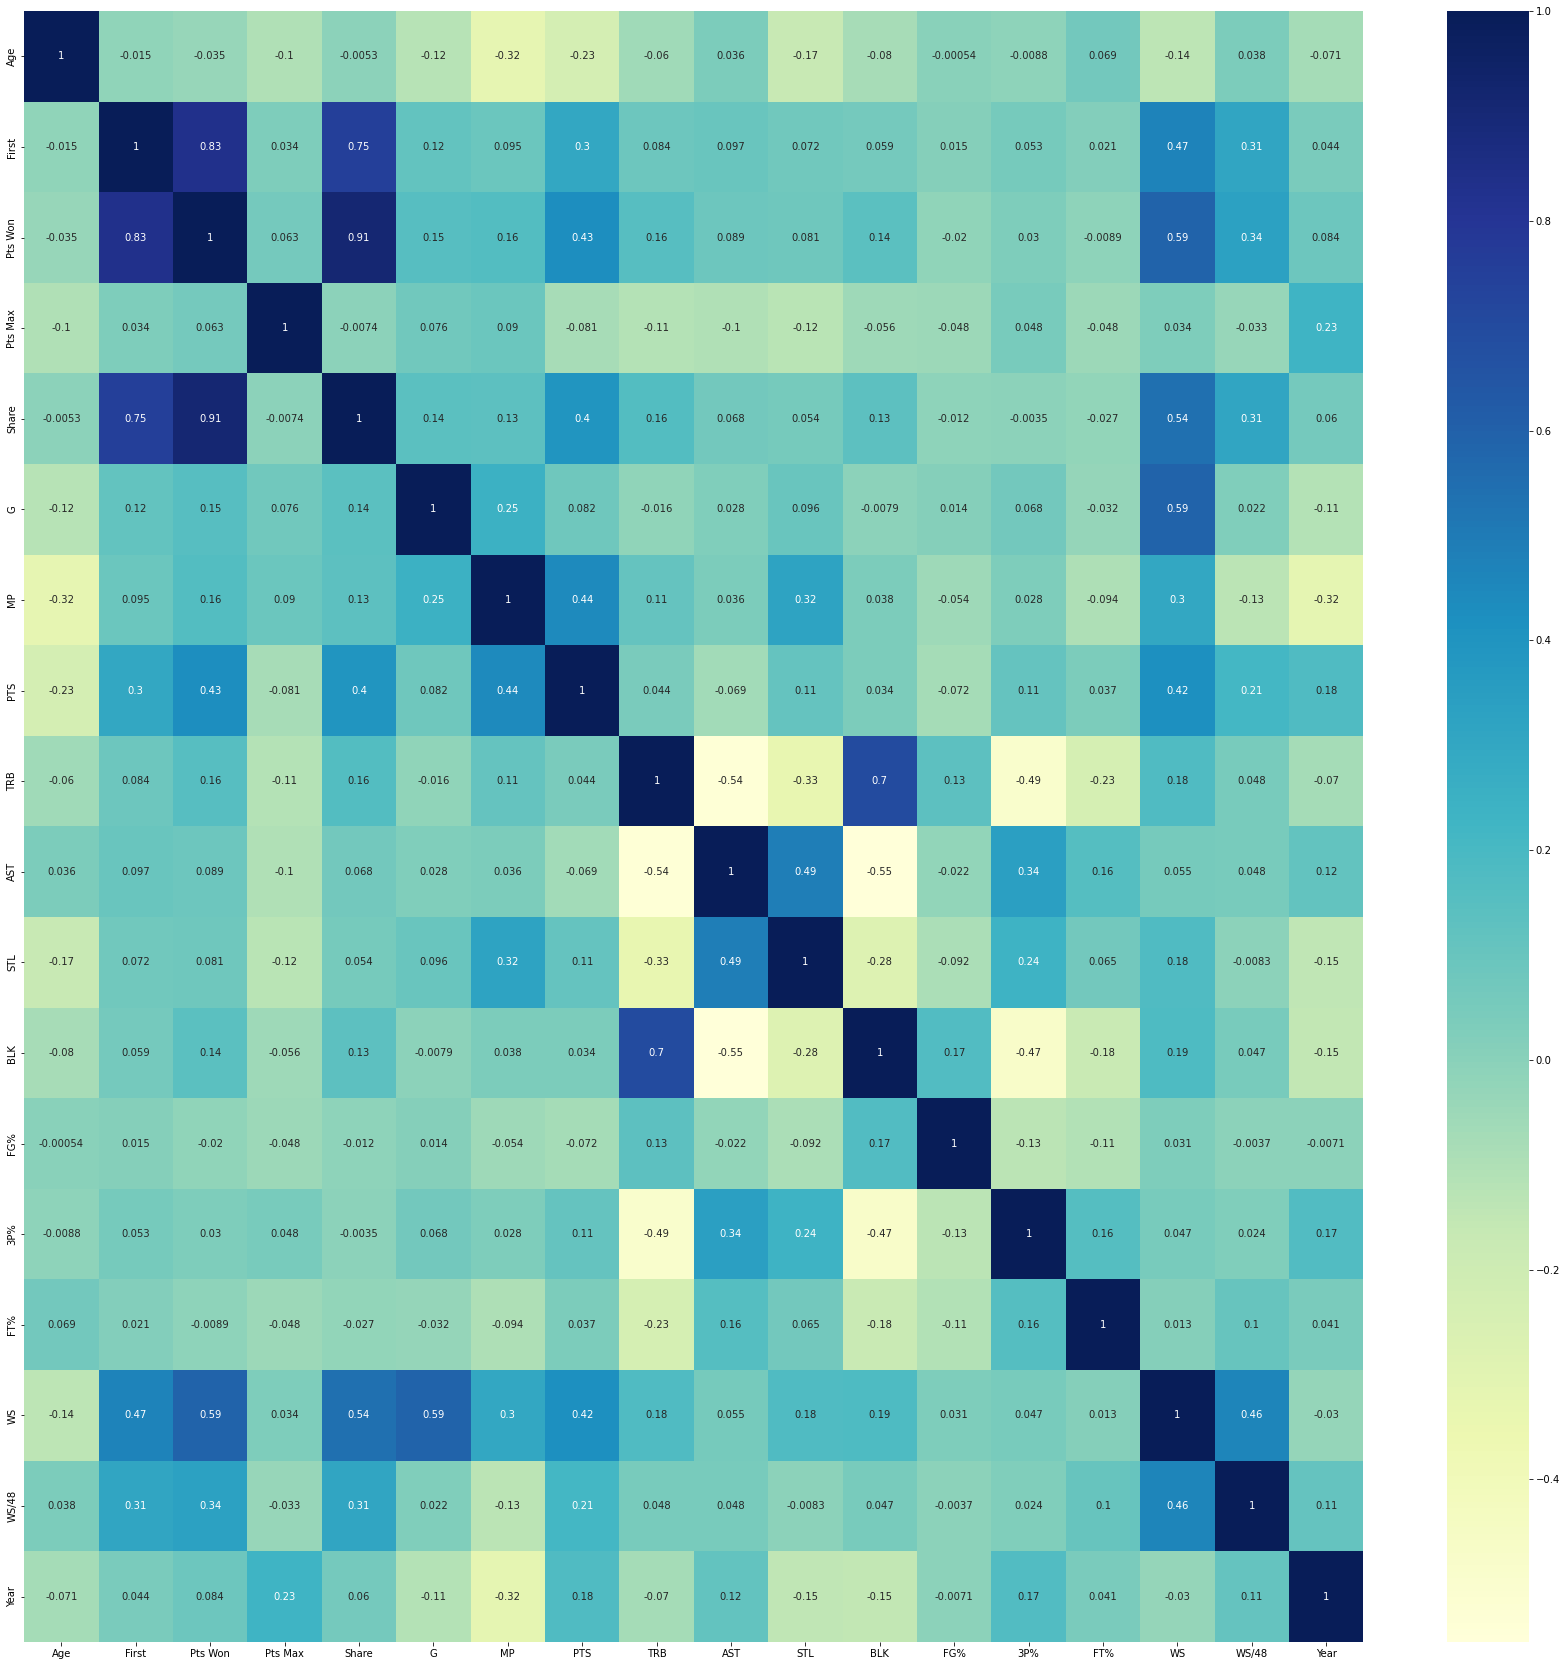

In [120]:
import seaborn as sb
import matplotlib.pyplot as plt

plt.figure(figsize=(30,30))

dataplot = sb.heatmap(mvps_df.corr(), cmap="YlGnBu", annot=True, )
  
# displaying heatmap
plt.show()

#1a. Apakah yang menjadi faktor utama (secara statistik) seorang pemain menjadi MVP?

In [121]:
mvps_df["is_mvp"] = ''
display(mvps_df)

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year,is_mvp
0,1,Michael Jordan,27,CHI,77,891,960,928.0,82,37.0,...,5.5,2.7,1.0,539.00,312.00,851.00,20.3,321.0,1991,
1,2,Magic Johnson,31,LAL,10,497,960,518.0,79,37.1,...,12.5,1.3,0.2,477.00,0.32,906.00,15.4,251.0,1991,
2,3,David Robinson,25,SAS,6,476,960,496.0,82,37.7,...,2.5,1.5,3.9,552.00,143.00,762.00,17.0,264.0,1991,
3,4,Charles Barkley,27,PHI,2,222,960,231.0,67,37.3,...,4.2,1.6,0.5,0.57,284.00,722.00,13.4,258.0,1991,
4,5,Karl Malone,27,UTA,0,142,960,148.0,82,40.3,...,3.3,1.1,1.0,527.00,286.00,0.77,15.5,225.0,1991,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,11,Russell Westbrook,32,WAS,0,5,1010,5.0,65,36.4,...,11.7,1.4,0.4,439.00,315.00,656.00,3.7,75.0,2021,
470,12,Ben Simmons,24,PHI,0,3,1010,3.0,58,32.4,...,6.9,1.6,0.6,557.00,0.30,613.00,6.0,153.0,2021,
471,13T,James Harden,31,TOT,0,1,1010,1.0,44,36.6,...,10.8,1.2,0.8,466.00,362.00,861.00,7.0,208.0,2021,
472,13T,LeBron James,36,LAL,0,1,1010,1.0,45,33.4,...,7.8,1.1,0.6,513.00,365.00,698.00,5.6,179.0,2021,


In [122]:
mvps_df.loc[mvps_df["Rank"] == "1", "is_mvp"] = 1
mvps_df.loc[mvps_df["Rank"] != "1", "is_mvp"] = 0
display(mvps_df)

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year,is_mvp
0,1,Michael Jordan,27,CHI,77,891,960,928.0,82,37.0,...,5.5,2.7,1.0,539.00,312.00,851.00,20.3,321.0,1991,1
1,2,Magic Johnson,31,LAL,10,497,960,518.0,79,37.1,...,12.5,1.3,0.2,477.00,0.32,906.00,15.4,251.0,1991,0
2,3,David Robinson,25,SAS,6,476,960,496.0,82,37.7,...,2.5,1.5,3.9,552.00,143.00,762.00,17.0,264.0,1991,0
3,4,Charles Barkley,27,PHI,2,222,960,231.0,67,37.3,...,4.2,1.6,0.5,0.57,284.00,722.00,13.4,258.0,1991,0
4,5,Karl Malone,27,UTA,0,142,960,148.0,82,40.3,...,3.3,1.1,1.0,527.00,286.00,0.77,15.5,225.0,1991,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,11,Russell Westbrook,32,WAS,0,5,1010,5.0,65,36.4,...,11.7,1.4,0.4,439.00,315.00,656.00,3.7,75.0,2021,0
470,12,Ben Simmons,24,PHI,0,3,1010,3.0,58,32.4,...,6.9,1.6,0.6,557.00,0.30,613.00,6.0,153.0,2021,0
471,13T,James Harden,31,TOT,0,1,1010,1.0,44,36.6,...,10.8,1.2,0.8,466.00,362.00,861.00,7.0,208.0,2021,0
472,13T,LeBron James,36,LAL,0,1,1010,1.0,45,33.4,...,7.8,1.1,0.6,513.00,365.00,698.00,5.6,179.0,2021,0


In [123]:
arr_init_name = nicknames_df['Abbreviation'].values

for i in arr_init_name : 
    val_real_team_name = nicknames_df['Name'].loc[nicknames_df['Abbreviation'] == i].values
    mvps_df.loc[mvps_df["Tm"] == i, "Tm"] = val_real_team_name[0]

display(mvps_df)

mvps_df.rename(columns = {'Tm':'Team'}, inplace = True)

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year,is_mvp
0,1,Michael Jordan,27,Chicago Bulls,77,891,960,928.0,82,37.0,...,5.5,2.7,1.0,539.00,312.00,851.00,20.3,321.0,1991,1
1,2,Magic Johnson,31,Los Angeles Lakers,10,497,960,518.0,79,37.1,...,12.5,1.3,0.2,477.00,0.32,906.00,15.4,251.0,1991,0
2,3,David Robinson,25,San Antonio Spurs,6,476,960,496.0,82,37.7,...,2.5,1.5,3.9,552.00,143.00,762.00,17.0,264.0,1991,0
3,4,Charles Barkley,27,Philadelphia 76ers,2,222,960,231.0,67,37.3,...,4.2,1.6,0.5,0.57,284.00,722.00,13.4,258.0,1991,0
4,5,Karl Malone,27,Utah Jazz,0,142,960,148.0,82,40.3,...,3.3,1.1,1.0,527.00,286.00,0.77,15.5,225.0,1991,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,11,Russell Westbrook,32,Washington Wizards,0,5,1010,5.0,65,36.4,...,11.7,1.4,0.4,439.00,315.00,656.00,3.7,75.0,2021,0
470,12,Ben Simmons,24,Philadelphia 76ers,0,3,1010,3.0,58,32.4,...,6.9,1.6,0.6,557.00,0.30,613.00,6.0,153.0,2021,0
471,13T,James Harden,31,TOT,0,1,1010,1.0,44,36.6,...,10.8,1.2,0.8,466.00,362.00,861.00,7.0,208.0,2021,0
472,13T,LeBron James,36,Los Angeles Lakers,0,1,1010,1.0,45,33.4,...,7.8,1.1,0.6,513.00,365.00,698.00,5.6,179.0,2021,0


In [124]:

teams_col = teams_df.columns
for i in teams_col :
    if i != "Team" :
        teams_df[i] = pd.to_numeric(teams_df[i], errors='coerce')

temp_teams = teams_df.groupby("Year").mean().reset_index()
year = temp_teams['Year'].values

d = {"score" : []}
temp_pd = pd.DataFrame(data = d)
for i in year :
    val =  temp_teams['GB'].loc[temp_teams['Year'] == i].values
    temp = teams_df['GB'].loc[teams_df["Year"] == i].fillna(val[0])
    temp_pd = pd.concat([temp_pd, temp])

# del temp_pd["score"]
teams_df["GB"] = temp_pd[0]
display(teams_df)

,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,56,26,683.0,20.956522,111.5,105.7,5.22,1991,Boston Celtics
1,44,38,537.0,12.000000,105.4,105.6,-0.39,1991,Philadelphia 76ers
2,39,43,476.0,17.000000,103.1,103.3,-0.43,1991,New York Knicks
3,30,52,366.0,26.000000,101.4,106.4,-4.84,1991,Washington Bullets
4,26,56,317.0,30.000000,102.9,107.5,-4.53,1991,New Jersey Nets
...,...,...,...,...,...,...,...,...,...
1028,42,30,583.0,13.541667,112.4,110.2,2.26,2021,Dallas Mavericks
1029,38,34,528.0,4.000000,113.3,112.3,1.07,2021,Memphis Grizzlies
1030,33,39,458.0,9.000000,111.1,112.8,-1.58,2021,San Antonio Spurs
1031,31,41,431.0,11.000000,114.6,114.9,-0.20,2021,New Orleans Pelicans


In [125]:
mvps_and_teams = mvps_df.merge(teams_df, on=['Team','Year'])
display(mvps_and_teams)

,Rank,Player,Age,Team,First,Pts Won,Pts Max,Share,G,MP,...,WS/48,Year,is_mvp,W,L,W/L%,GB,PS/G,PA/G,SRS
0,1,Michael Jordan,27,Chicago Bulls,77,891,960,928.00,82,37.0,...,321.00,1991,1,61,21,744.0,20.956522,110.0,101.0,8.57
1,2,Magic Johnson,31,Los Angeles Lakers,10,497,960,518.00,79,37.1,...,251.00,1991,0,58,24,707.0,5.000000,106.3,99.6,6.73
2,3,David Robinson,25,San Antonio Spurs,6,476,960,496.00,82,37.7,...,264.00,1991,0,55,27,671.0,20.956522,107.1,102.6,4.30
3,4,Charles Barkley,27,Philadelphia 76ers,2,222,960,231.00,67,37.3,...,258.00,1991,0,44,38,537.0,12.000000,105.4,105.6,-0.39
4,5,Karl Malone,27,Utah Jazz,0,142,960,148.00,82,40.3,...,225.00,1991,0,54,28,659.0,1.000000,104.0,100.7,3.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,8,Julius Randle,26,New York Knicks,0,20,1010,0.02,71,37.6,...,0.14,2021,0,41,31,569.0,8.000000,107.0,104.7,2.13
463,10,Rudy Gobert,28,Utah Jazz,0,8,1010,8.00,71,30.8,...,248.00,2021,0,52,20,722.0,13.541667,116.4,107.2,8.97
464,11,Russell Westbrook,32,Washington Wizards,0,5,1010,5.00,65,36.4,...,75.00,2021,0,34,38,472.0,7.000000,116.6,118.5,-1.85
465,13T,LeBron James,36,Los Angeles Lakers,0,1,1010,1.00,45,33.4,...,179.00,2021,0,42,30,583.0,9.000000,109.5,106.8,2.77


In [126]:
col = mvps_and_teams.columns

for i in col :
    if i != "Rank" and i != "Player" and i != "Team" and i != "is_mvp" :
        mvps_and_teams[i] = pd.to_numeric(mvps_and_teams[i])

mvps_and_teams.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 467 entries, 0 to 466
Data columns (total 29 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rank     467 non-null    object 
 1   Player   467 non-null    object 
 2   Age      467 non-null    int64  
 3   Team     467 non-null    object 
 4   First    467 non-null    int64  
 5   Pts Won  467 non-null    int64  
 6   Pts Max  467 non-null    int64  
 7   Share    467 non-null    float64
 8   G        467 non-null    int64  
 9   MP       467 non-null    float64
 10  PTS      467 non-null    float64
 11  TRB      467 non-null    float64
 12  AST      467 non-null    float64
 13  STL      467 non-null    float64
 14  BLK      467 non-null    float64
 15  FG%      467 non-null    float64
 16  3P%      467 non-null    float64
 17  FT%      467 non-null    float64
 18  WS       467 non-null    float64
 19  WS/48    467 non-null    float64
 20  Year     467 non-null    int64  
 21  is_mvp   467 non

In [127]:
X_raw = mvps_and_teams.drop(["Rank", "Player", "Team"],axis=1)
lst_column = X_raw.columns
y = mvps_and_teams["is_mvp"]
X_raw = X_raw.drop(["is_mvp"],axis=1)

display(lst_column)

Index(['Age', 'First', 'Pts Won', 'Pts Max', 'Share', 'G', 'MP', 'PTS', 'TRB',
       'AST', 'STL', 'BLK', 'FG%', '3P%', 'FT%', 'WS', 'WS/48', 'Year',
       'is_mvp', 'W', 'L', 'W/L%', 'GB', 'PS/G', 'PA/G', 'SRS'],
      dtype='object')

In [128]:
from scipy.stats import pearsonr

for i in lst_column :
    if i != "is_mvp" :
        corr, _ = pearsonr(mvps_and_teams[i], mvps_and_teams["is_mvp"])
        if corr > 0.1 :
            print(i + " : " + str(corr))

First : 0.9217981829015235
Pts Won : 0.7120673799647419
Share : 0.6708995401575366
PTS : 0.2512041440039777
WS : 0.3922461508985588
WS/48 : 0.2779454293078143
W : 0.25076225864874346
W/L% : 0.11227508768540669
GB : 0.1501843906437084
SRS : 0.2557466449068887


Dengan melihat korelasi di atas diketahui bahwa terdapat 10 variable yang dapat menjadi faktor pemain menjadi MVP, yaitu First, Pts Won, Share, PTS, WS, WS/48, Win dari teamnya pada tahun itu, W/L% dari teamnya pada tahun itu, GB dari teamnya pada tahun itu, dan SRS dari teamnya pada tahun itu

In [129]:
rank_one = mvps_df.loc[mvps_df['Rank'] == '1']
display(rank_one.head())

,Rank,Player,Age,Team,First,Pts Won,Pts Max,Share,G,MP,...,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year,is_mvp
0,1,Michael Jordan,27,Chicago Bulls,77,891,960,928.00,82,37.0,...,5.5,2.7,1.0,539.00,312.00,851.0,20.3,321.00,1991,1
20,1,Michael Jordan,28,Chicago Bulls,80,900,960,938.00,80,38.8,...,6.1,2.3,0.9,519.00,0.27,832.0,17.7,274.00,1992,1
37,1,Charles Barkley,29,Phoenix Suns,59,835,980,852.00,76,37.6,...,5.1,1.6,1.0,0.52,305.00,765.0,14.4,242.00,1993,1
51,1,Hakeem Olajuwon,31,Houston Rockets,66,889,1010,0.88,80,41.0,...,3.6,1.6,3.7,528.00,421.00,716.0,14.3,0.21,1994,1
68,1,David Robinson,29,San Antonio Spurs,73,901,1050,858.00,81,38.0,...,2.9,1.7,3.2,0.53,0.30,774.0,17.5,273.00,1995,1


In [130]:
rank_one[['First', 'Pts Won', 'Share', 'PTS', 'WS', 'WS/48']].describe()

,First,Pts Won,Share,PTS,WS,WS/48
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,87.161290,1045.967742,815.060000,27.158065,15.845161,254.109677
std,23.395294,137.332804,281.320447,3.692946,2.955203,76.386628
min,44.000000,827.000000,0.880000,15.500000,9.600000,0.190000
25%,67.500000,932.500000,845.500000,25.250000,14.050000,240.000000
50%,85.000000,1066.000000,904.000000,27.600000,15.800000,274.000000
75%,109.000000,1177.000000,958.000000,29.900000,18.100000,296.500000
max,131.000000,1310.000000,998.000000,32.000000,20.400000,322.000000


#1b. Apakah terdapat kenaikan rata-rata gaji pemain dari tahun 2000 - 2019?

In [131]:
df_salaries_year = salaries_df.groupby("Year")["Salaries"].mean().reset_index()
df_salaries_year = df_salaries_year.astype({"Year":'category'})

<AxesSubplot:xlabel='Year'>

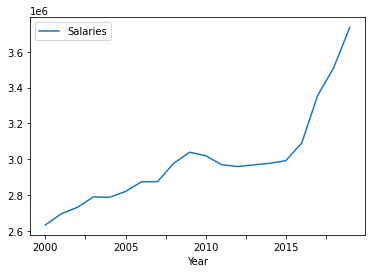

In [132]:
axes = plt.gca()
df_salaries_year.set_index('Year', inplace=True)
df_salaries_year.plot(kind="line", y="Salaries", ax=axes)

Dengan melihat grafik di atas diketahui bahwa secara garis besar terdapat perumbuhan gaji dari 2000 - 2019. Pertumbuhan gaji naik secara signifikan pada rentang 2015 - 2019. Namun, seperti yang kita ketahui nilai dari mata uang mengalami inflasi dari setiap tahunnya sehingga kita perlu membandingkan nilai pada tahun selain 2019 dengan tahun 2019. Pada kali ini saya menggunakan dataset harga persentase dolar dengan tahun 2019. Sumber data berasal dari https://www.in2013dollars.com/us/inflation/2003


<AxesSubplot:xlabel='Year'>

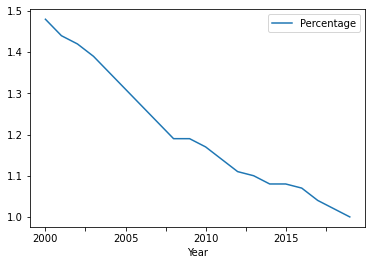

In [133]:
inflation_df = pd.read_excel("datasets/persentase_dolar_2000_2019.xlsx")

inflation_df = inflation_df.astype({"Year":'category'})

axes = plt.gca()
inflation_df.set_index('Year', inplace=True)
inflation_df.plot(kind="line", y="Percentage", ax=axes)

Dari grafik di atas diketahui terdapat penurunan nilai, sehingga secara garis besar setaip tahun mengalami penurunan nilai mata uang (inflasi). Dengan demikina kita perlu mengetahui nilai asli salaries sesuai dengan tahun 2019

<AxesSubplot:xlabel='Year'>

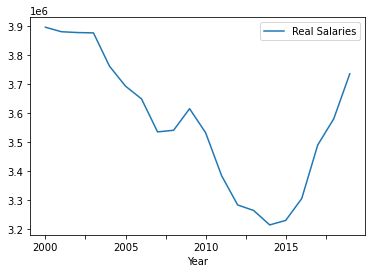

In [134]:
salaries_df_update = df_salaries_year.merge(inflation_df, on="Year").reset_index()

salaries_df_update["Real Salaries"] = salaries_df_update["Salaries"] * salaries_df_update["Percentage"]

axes = plt.gca()
salaries_df_update.set_index('Year', inplace=True)
salaries_df_update.plot(kind="line", y="Real Salaries", ax=axes)

Dari visualisasi di atas diketahui bahwa rata-rata gaji pemain pada tahun 2019 lebih kecil dibanding tahun 2000. Lalu, terjadi penurunan rata-rata gaji pemain dari rentang tahun 2000 - 2014 dan rata-rata gaji pemain mulai kembali naik pada rentang 2014-2019

#1c. Apakah kemenangan dari suatu tim dapat dikorelasikan dengan suatu variabel tertentu?

In [135]:
display(teams_df.head())

,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,56,26,683.0,20.956522,111.5,105.7,5.22,1991,Boston Celtics
1,44,38,537.0,12.000000,105.4,105.6,-0.39,1991,Philadelphia 76ers
2,39,43,476.0,17.000000,103.1,103.3,-0.43,1991,New York Knicks
3,30,52,366.0,26.000000,101.4,106.4,-4.84,1991,Washington Bullets
4,26,56,317.0,30.000000,102.9,107.5,-4.53,1991,New Jersey Nets


In [136]:
display(players_df)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1,Alaa Abdelnaby,PF,22,POR,43,0,6.7,1.3,2.7,...,0.6,1.4,2.1,0.3,0.1,0.3,0.5,0.9,3.1,1991
1,2,Mahmoud Abdul-Rauf,PG,21,DEN,67,19,22.5,6.2,15.1,...,0.5,1.3,1.8,3.1,0.8,0.1,1.6,2.2,14.1,1991
2,3,Mark Acres,C,28,ORL,68,0,19.3,1.6,3.1,...,2.1,3.2,5.3,0.4,0.4,0.4,0.6,3.2,4.2,1991
3,4,Michael Adams,PG,28,DEN,66,66,35.5,8.5,21.5,...,0.9,3,3.9,10.5,2.2,0.1,3.6,2.5,26.5,1991
4,5,Mark Aguirre,SF,31,DET,78,13,25.7,5.4,11.7,...,1.7,3.1,4.8,1.8,0.6,0.3,1.6,2.7,14.2,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18039,536,Delon Wright,PG,28,SAC,27,8,25.8,3.9,8.3,...,1,2.9,3.9,3.6,1.6,0.4,1.3,1.1,10,2021
18040,537,Thaddeus Young,PF,32,CHI,68,23,24.3,5.4,9.7,...,2.5,3.8,6.2,4.3,1.1,0.6,2,2.2,12.1,2021
18041,538,Trae Young,PG,22,ATL,63,63,33.7,7.7,17.7,...,0.6,3.3,3.9,9.4,0.8,0.2,4.1,1.8,25.3,2021
18042,539,Cody Zeller,C,28,CHO,48,21,20.9,3.8,6.8,...,2.5,4.4,6.8,1.8,0.6,0.4,1.1,2.5,9.4,2021


In [137]:
temp_player_df = players_df.copy()
temp_player_df = temp_player_df.drop(["Rk", "Player", "Pos"],axis=1)
lst_column_temp_player = temp_player_df.columns


for i in lst_column_temp_player :
    if i != "Tm" :
        temp_player_df[i] = pd.to_numeric(temp_player_df[i], errors='coerce')

In [138]:
data_player_groupby_team_and_year = temp_player_df.groupby(['Tm','Year']).mean().reset_index()
display(data_player_groupby_team_and_year.head())

,Tm,Year,Age,G,GS,MP,FG,FGA,FG%,3P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,ATL,1991,27.357143,59.928571,29.285714,19.442857,3.200000,6.935714,381.340714,0.242857,...,599.428571,1.171429,2.428571,3.600000,1.814286,0.714286,0.371429,1.221429,1.785714,8.628571
1,ATL,1992,26.600000,54.600000,27.333333,21.120000,3.773333,8.126667,465.800000,0.333333,...,529.430000,1.320000,2.466667,3.786667,2.213333,0.806667,0.326667,1.326667,1.913333,9.526667
2,ATL,1993,27.058824,49.235294,24.117647,18.529412,2.976471,6.558824,313.574118,0.347059,...,421.231176,1.194118,2.164706,3.358824,1.870588,0.776471,0.282353,1.235294,1.852941,7.694118
3,ATL,1994,28.133333,54.933333,27.333333,20.113333,3.406667,7.460000,399.367333,0.246667,...,531.097333,1.233333,2.426667,3.660000,2.040000,0.893333,0.440000,1.260000,1.740000,8.706667
4,ATL,1995,28.777778,45.833333,22.777778,19.144444,2.827778,6.544444,328.299444,0.438889,...,537.312222,1.150000,2.588889,3.727778,1.672222,0.666667,0.405556,1.238889,1.805556,7.544444


In [139]:
arr_init_name = nicknames_df['Abbreviation'].values

for i in arr_init_name : 
    val_real_team_name = nicknames_df['Name'].loc[nicknames_df['Abbreviation'] == i].values
    data_player_groupby_team_and_year.loc[data_player_groupby_team_and_year["Tm"] == i, "Tm"] = val_real_team_name[0]

In [140]:
data_player_groupby_team_and_year.rename(columns = {'Tm':'Team' }, inplace = True)


In [141]:
new_data = pd.merge(data_player_groupby_team_and_year, teams_df)


In [142]:
lst_column = new_data.columns

for i in lst_column :
    if i != "Team" and i != "Year" and i != "W":
        corr, _ = pearsonr(new_data[i], new_data["W"])
        if corr > 0.1 :
            print(i + " : " + str(corr))

Age : 0.442802069649119
G : 0.3996209399493923
GS : 0.365175035754813
FG% : 0.12783300867285402
3P% : 0.12018030872938014
2P% : 0.10292221361507631
eFG% : 0.11459375970752972
W/L% : 0.5924524173603722
PS/G : 0.32807662283848504
SRS : 0.9321367483883654


Dari hasil menggabungkan teams dan playerdata yang akhirnya mendapatkan banyak variable penilaian. Setelah dicek variable-variable yang ada dengan jumlah kemenangannya diketahui bahwa yang memiliki korelasi paling tinggi adalah dengan jumlah kemenangan adalah SRS (Simple Rating System). Namun, seperti yang kita ketahui bahwa SRS didapatkan dari persentase kemanangannya. Apabila dilihat dari komposisi pemainya beberapa varaibel yang bisa dijadikan acuan adalah  PS/G (passing per game), G (Game played), GS (Game started), FG% (Field Goal Percentage), 3P% (3 Point Field Goal Percentage), 2P% (2 Point Field Goal Percentage) dan eFG% (Effective Field Goal Percentage)

In [143]:
new_data['W/L%'] = new_data['W']/(new_data['W']+new_data['L'])*100
new_data['W-L%'] = abs(new_data['W']-new_data['L'])/abs(new_data['W']+new_data['L'])*100
new_data['W-L'] = abs(new_data['W']-new_data['L'])
display(new_data['W/L%'])
# new_data.to_excel("new_data.xlsx")
display(new_data)

0      52.439024
1      46.341463
2      52.439024
3      69.512195
4      51.219512
         ...    
901    26.829268
902    29.268293
903    25.609756
904    47.560976
905    53.658537
Name: W/L%, Length: 906, dtype: float64

,Team,Year,Age,G,GS,MP,FG,FGA,FG%,3P,...,PTS,W,L,W/L%,GB,PS/G,PA/G,SRS,W-L%,W-L
0,Atlanta Hawks,1991,27.357143,59.928571,29.285714,19.442857,3.200000,6.935714,381.340714,0.242857,...,8.628571,43,39,52.439024,18.000000,109.8,109.0,0.72,4.878049,4
1,Atlanta Hawks,1992,26.600000,54.600000,27.333333,21.120000,3.773333,8.126667,465.800000,0.333333,...,9.526667,38,44,46.341463,29.000000,106.2,107.7,-1.15,7.317073,6
2,Atlanta Hawks,1993,27.058824,49.235294,24.117647,18.529412,2.976471,6.558824,313.574118,0.347059,...,7.694118,43,39,52.439024,14.000000,107.5,108.4,-0.67,4.878049,4
3,Atlanta Hawks,1994,28.133333,54.933333,27.333333,20.113333,3.406667,7.460000,399.367333,0.246667,...,8.706667,57,25,69.512195,20.869565,101.4,96.2,4.94,39.024390,32
4,Atlanta Hawks,1995,28.777778,45.833333,22.777778,19.144444,2.827778,6.544444,328.299444,0.438889,...,7.544444,42,40,51.219512,10.000000,96.6,95.3,1.06,2.439024,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,Washington Bullets,1993,26.052632,43.947368,21.578947,18.515789,3.157895,6.694737,335.844211,0.163158,...,7.947368,22,60,26.829268,38.000000,101.9,108.9,-6.49,46.341463,38
902,Washington Bullets,1994,26.500000,42.300000,20.500000,18.350000,2.750000,5.965000,386.773500,0.205000,...,7.220000,24,58,29.268293,33.000000,100.4,107.7,-7.13,41.463415,34
903,Washington Bullets,1995,25.187500,50.437500,25.625000,23.550000,3.675000,8.125000,417.160000,0.475000,...,9.675000,21,61,25.609756,36.000000,100.5,106.1,-5.56,48.780488,40
904,Washington Bullets,1996,26.190476,39.142857,19.523810,18.695238,2.990476,6.404762,400.695238,0.509524,...,7.957143,39,43,47.560976,21.000000,102.5,101.5,0.99,4.878049,4


In [144]:
new_data_three = new_data.groupby('Year')['W-L%'].mean().reset_index()

display(new_data_three[new_data_three['W-L%'] == new_data_three['W-L%'].min()])

,Year,W-L%
16,2007,20.813008


In [145]:
from scipy.stats import skew

lst_year = new_data["Year"].unique()

lst_skew_score = []

for i in lst_year :
    temp_df = new_data.loc[new_data["Year"] == i]
    skew_score = skew(temp_df["W/L%"])
    lst_skew_score.append(skew_score)
    


for i in range(len(lst_skew_score)) :
    lst_skew_score[i] = abs(lst_skew_score[i])
min_score = min(lst_skew_score)
print(lst_skew_score)

idx = lst_skew_score.index(min_score)

print("Tahun paling kompetitif adalah " + str(lst_year[idx]))

[0.07716440624995054, 0.16836370581992618, 0.44326330792503504, 0.362312259743163, 0.12378828998138366, 0.11782725003664143, 0.06781080148054061, 0.38774908029761135, 0.4955958890149415, 0.2907658947959111, 0.6094591791625882, 0.11997063147455612, 0.41594802501754585, 0.055668607913878204, 0.4040247050137291, 0.24790574163071116, 0.4500548510104214, 0.18485843020472792, 0.0001498051363058389, 0.45934880303349956, 0.16304435928956895, 0.3588766778390481, 0.08662079507532693, 0.28504857128434535, 0.2381824119054705, 0.010379300771387316, 0.23906836964688033, 0.12805403413205527, 0.4207633482802097, 0.048353206880945916, 0.24917365866927313]
Tahun paling kompetitif adalah 2009


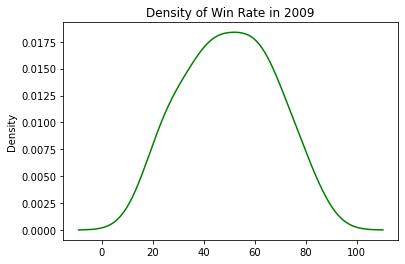

In [146]:
import matplotlib.pyplot as plt

temp_df = new_data.loc[new_data["Year"] == 2009]
temp_df["W/L%"].plot.density(color='green')
plt.title('Density of Win Rate in 2009')
plt.show()

Dengan melihat evaluasi di atas, didapatkan lah bahwa 2009 memiliki tahun yang paling kompetitif karena dengan melihat persebaran nilai win rate dengan menggunakan skewnessnya

In [147]:
lst_column_temp_player = players_df.columns

for i in lst_column_temp_player :
    if i != "Tm" and i != "Rk" and i != "Player" and i != "Pos":
        players_df[i] = pd.to_numeric(players_df[i], errors='coerce')

Referensi game score : https://www.basketball-reference.com/about/glossary.html#pts


In [148]:
players_df["Avg GameScore"] = players_df["PTS"] + (0.4 * players_df["FG"]) - (0.7 * players_df["FGA"]) - (0.4*(players_df["FTA"] - players_df["FT"])) + (0.7 * players_df["ORB"]) + (0.3 * players_df["DRB"]) + players_df["STL"] + (0.7* players_df["AST"]) + (0.7* players_df["BLK"]) - (0.4* players_df["PF"]) - players_df["TOV"]

In [149]:
avg_age_and_gamescore = players_df.groupby("Age")["Avg GameScore"].mean().reset_index()

display(avg_age_and_gamescore[avg_age_and_gamescore["Avg GameScore"] == avg_age_and_gamescore["Avg GameScore"].max()])

,Age,Avg GameScore
10,28,6.945052


Dengan mempertimbangkan nilai Gamescorenya, umur golden age adalah 28 tahun dengan melihat rata-rata gamescore terbesar

In [150]:
for i in arr_init_name : 
    val_real_team_name = nicknames_df['Name'].loc[nicknames_df['Abbreviation'] == i].values
    players_df.loc[players_df["Tm"] == i, "Tm"] = val_real_team_name[0]

display(players_df)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Avg GameScore
0,1,Alaa Abdelnaby,PF,22,Portland Trail Blazers,43,0,6.7,1.3,2.7,...,1.4,2.1,0.3,0.1,0.3,0.5,0.9,3.1,1991,2.07
1,2,Mahmoud Abdul-Rauf,PG,21,Denver Nuggets,67,19,22.5,6.2,15.1,...,1.3,1.8,3.1,0.8,0.1,1.6,2.2,14.1,1991,7.23
2,3,Mark Acres,C,28,Orlando Magic,68,0,19.3,1.6,3.1,...,3.2,5.3,0.4,0.4,0.4,0.6,3.2,4.2,1991,3.98
3,4,Michael Adams,PG,28,Denver Nuggets,66,66,35.5,8.5,21.5,...,3.0,3.9,10.5,2.2,0.1,3.6,2.5,26.5,1991,21.00
4,5,Mark Aguirre,SF,31,Detroit Pistons,78,13,25.7,5.4,11.7,...,3.1,4.8,1.8,0.6,0.3,1.6,2.7,14.2,1991,9.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18039,536,Delon Wright,PG,28,Sacramento Kings,27,8,25.8,3.9,8.3,...,2.9,3.9,3.6,1.6,0.4,1.3,1.1,10.0,2021,9.90
18040,537,Thaddeus Young,PF,32,Chicago Bulls,68,23,24.3,5.4,9.7,...,3.8,6.2,4.3,1.1,0.6,2.0,2.2,12.1,2021,11.73
18041,538,Trae Young,PG,22,Atlanta Hawks,63,63,33.7,7.7,17.7,...,3.3,3.9,9.4,0.8,0.2,4.1,1.8,25.3,2021,19.70
18042,539,Cody Zeller,C,28,Charlotte Hornets,48,21,20.9,3.8,6.8,...,4.4,6.8,1.8,0.6,0.4,1.1,2.5,9.4,2021,8.99


In [151]:
the_best_player_from_team_each_year = players_df.groupby(["Tm","Year"]).agg({"Avg GameScore" : max}).reset_index()
the_best_player_from_team_each_year = the_best_player_from_team_each_year.merge(players_df, on=["Tm", "Year", "Avg GameScore"], how="inner")

display(the_best_player_from_team_each_year)

,Tm,Year,Avg GameScore,Rk,Player,Pos,Age,G,GS,MP,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Atlanta Hawks,1991,20.17,361,Dominique Wilkins,SF,31,81,81,38.0,...,829.0,3.2,5.8,9.0,3.3,1.5,0.8,2.5,1.9,25.9
1,Atlanta Hawks,1992,20.11,369,Dominique Wilkins,SF,32,42,42,38.1,...,835.0,2.5,4.6,7.0,3.8,1.2,0.6,2.9,1.8,28.1
2,Atlanta Hawks,1993,21.21,366,Dominique Wilkins,SF,33,71,70,37.3,...,828.0,2.6,4.2,6.8,3.2,1.0,0.4,2.6,1.6,29.9
3,Atlanta Hawks,1994,16.20,380,Dominique Wilkins,SF,34,49,49,34.4,...,854.0,2.4,3.8,6.2,2.3,1.3,0.4,2.4,1.8,24.4
4,Atlanta Hawks,1995,15.34,30,Mookie Blaylock,PG,27,80,80,38.4,...,729.0,1.5,3.5,4.9,7.7,2.5,0.3,3.0,2.1,17.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,Washington Wizards,2017,19.61,453,John Wall,PG,26,78,78,36.4,...,801.0,0.8,3.4,4.2,10.7,2.0,0.6,4.1,1.9,23.1
934,Washington Wizards,2018,15.72,37,Bradley Beal,SG,24,82,82,36.3,...,791.0,0.7,3.7,4.4,4.5,1.2,0.4,2.6,2.0,22.6
935,Washington Wizards,2019,19.12,40,Bradley Beal,SG,25,82,82,36.9,...,808.0,1.1,3.9,5.0,5.5,1.5,0.7,2.7,2.8,25.6
936,Washington Wizards,2020,21.24,35,Bradley Beal,SG,26,57,57,36.0,...,842.0,0.9,3.3,4.2,6.1,1.2,0.4,3.4,2.2,30.5
